In [391]:
import numpy as np
import sklearn.neighbors as neighbors
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
import numpy.linalg as la
from sklearn import cluster
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg

In [366]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=4)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
X, y = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=170)

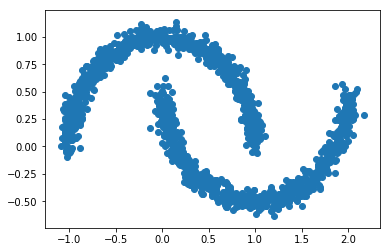

In [367]:

data, labels = noisy_moons

plt.scatter(data[:, 0], data[:, 1])
# for i in range(data.shape[0]):
#     plt.text(data[i,0], data[i,1], str(i))
plt.show()

In [381]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(la.norm(x1-x2)**2)/(2 * sigma ** 2))

def complete_graph_matrix(X, sigma):
    A = np.zeros((len(X), len(X)))
    for i in range(len(X)-1):
        for j in range(i+1, len(X)):
            A[i,j] = gaussian_kernel(X[i], X[j], sigma)
            A[j,i] = A[i,j]
            
    return A

def make_graphs(data, gamma, epsilon, k):
    # gamma = 1 / (2 * sigma^2)
    fully_connected = rbf_kernel(data, gamma=gamma)
    knn = neighbors.kneighbors_graph(data, n_neighbors=k).toarray()
    epsilon = neighbors.radius_neighbors_graph(data, radius=epsilon).toarray()
    
    # make knn adjacency matrix symmetric
    knn = 0.5 * (knn + knn.T)
    
    return fully_connected, knn, epsilon

In [369]:
full, nn, eps = make_graphs(data, gamma=1 / 0.01, epsilon=0.2, k=1)

0.0

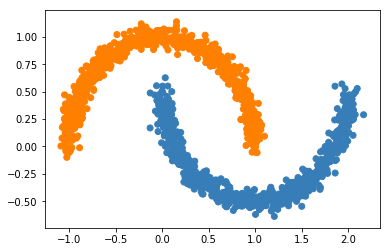

In [390]:
spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
        affinity='precomputed').fit(full)

y_pred = spectral.labels_

colors = ['#377eb8', '#ff7f00']
y_colors = [colors[label] for label in y_pred]

plt.scatter(data[:,0], data[:,1], color=y_colors)

accuracy_score(y_pred=y_pred, y_true=labels)

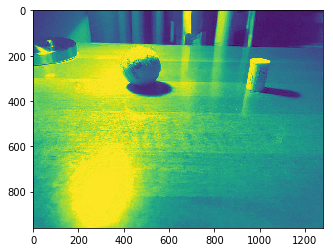

In [397]:
image = mpimg.imread("clustering1.jpg")
plt.imshow(image[:, :, 0])

C:\Users\Max\Documents\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


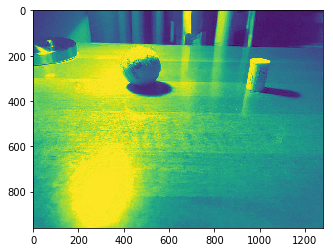

In [404]:
full, nn, eps = make_graphs(image[:, :, 0], gamma=1 / 0.01, epsilon=0.2, k=10)

spectral = cluster.SpectralClustering(n_clusters=2, eigen_solver='arpack',
        affinity='precomputed').fit(full)

y_pred = spectral.labels_

colors = ['#377eb8', '#ff7f00']
y_colors = [colors[label] for label in y_pred]

label_im = np.full(mask.shape, -1.)
label_im[mask] = labels

plt.matshow(img)
plt.matshow(label_im)